Paths are for dataset tagged: all


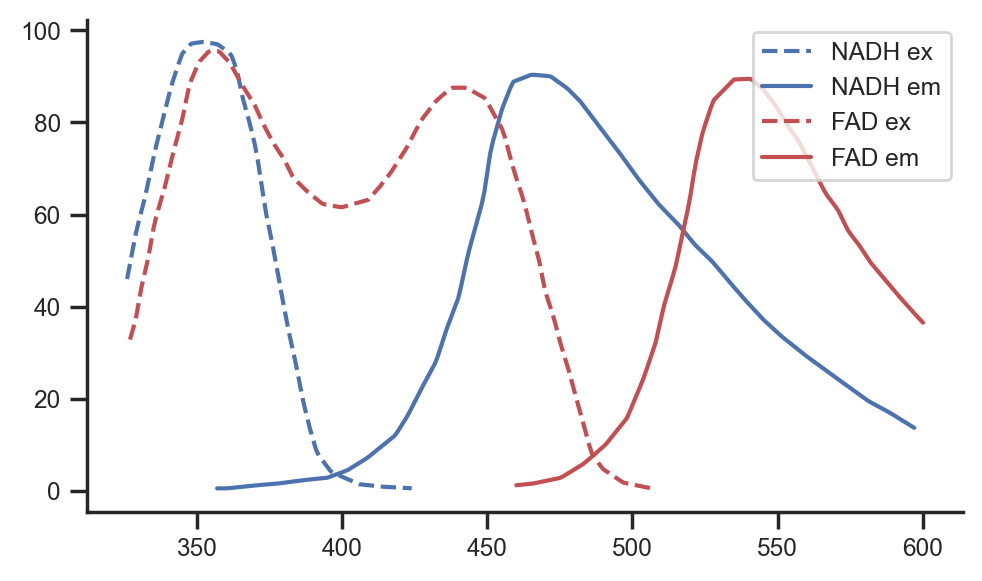

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sourcesep.utils.config import load_config

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

paths = load_config(dataset_key='all')
f, ax = plt.subplots(1,1,figsize=(5,3))
cc = ['b','r']
for i, af_src in enumerate(['NADH', 'FAD']):

# Load the data into a DataFrame
    df = pd.read_csv(paths['spectra'] / f'{af_src}.csv')
    df_ = df[['wavelength', f'{af_src} ex']].copy()
    df_.dropna(inplace=True)
    ax.plot(df_['wavelength'], df_[f'{af_src} ex'], f'--{cc[i]}',label = f'{af_src} ex')

    df_ = df[['wavelength', f'{af_src} em']].copy()
    df_.dropna(inplace=True)
    ax.plot(df_['wavelength'], df_[f'{af_src} em'], f'-{cc[i]}', label = f'{af_src} em')

plt.legend()
plt.tight_layout()
plt.show()

# Source for these spectra is https://www.becker-hickl.com/applications/metabolic-imaging/#application-principles
# data was extracted by hand using https://www.graphreader.com/
# For lasers > 400 nm, we should expect mainly FAD emission.